In [1]:
import glob
import pandas as pd


data_files = glob.glob("chess_ratings/*.csv")
all_dfs = [pd.read_csv(file, sep='|') for file in data_files]

/home/suchopag/.env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


## Explore one dataframe

In [2]:
example_df = all_dfs[0]
example_df.describe()

,ID Number,Rat,Gms,K,B-day,Year,Mon
count,2.932580e+05,293258.000000,293258.000000,293258.000000,293258.000000,293258.0,293258.0
mean,1.325035e+07,1725.286424,0.832172,30.982838,1921.470705,2017.0,12.0
std,1.569284e+07,337.988464,2.446003,10.258618,336.245521,0.0,0.0
min,1.000130e+05,1001.000000,0.000000,10.000000,0.000000,2017.0,12.0
25%,1.920861e+06,1475.000000,0.000000,20.000000,1963.000000,2017.0,12.0
50%,6.101108e+06,1747.000000,0.000000,40.000000,1982.000000,2017.0,12.0
75%,2.410765e+07,1986.000000,0.000000,40.000000,1998.000000,2017.0,12.0
max,3.962162e+08,2837.000000,68.000000,40.000000,2014.000000,2017.0,12.0


In [156]:
data[["K", "Mon"]].groupby("K").count()

,Mon
K,
0,2
10,155002
15,25
20,3395041
40,4531288


In [172]:
data[data["Sex"] == "F"]["Tit"].unique()

array([nan, 'WFM', 'WIM', 'WCM', 'WGM', 'IM', 'FM', 'CM', 'GM', 'WH'],
      dtype=object)

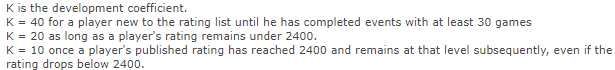

https://ratings.fide.com/calculator_rtd.phtml

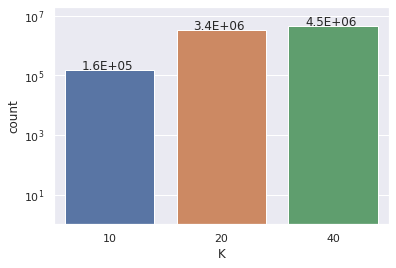

In [170]:
ax = sns.countplot(data=data, x="K", order=[10, 20, 40])
ax.set_yscale('log')
ax.set_ylim(1, 2*10**7)
ax.set_yticks([10, 10**3, 10**5, 10**7])

for p in ax.patches:
        ax.annotate('{:.1E}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+50))
plt.show()

In [3]:
example_df

,ID Number,Name,Fed,Sex,Tit,WTit,OTit,FOA,Rat,Gms,K,B-day,Flag,Year,Mon
0,644498,NaN,FRA,M,NaN,NaN,NaN,NaN,2008,1,20,0,NaN,2017,12
1,20504578,NaN,MAW,M,NaN,NaN,NaN,NaN,1617,0,40,0,NaN,2017,12
2,35077023,A Chakravarthy,IND,M,NaN,NaN,NaN,NaN,1151,0,40,1986,i,2017,12
3,10207538,"A E M, Doshtagir",BAN,M,NaN,NaN,NaN,NaN,1840,0,40,1974,i,2017,12
4,10206612,"A K M, Sourab",BAN,M,NaN,NaN,NaN,NaN,1708,4,40,0,NaN,2017,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293253,4126076,"Zytner, Yury",RUS,M,NaN,NaN,NaN,NaN,2261,0,20,1957,i,2017,12
293254,34190632,"Zyubin, Sergey",RUS,M,NaN,NaN,NaN,NaN,1884,0,40,1975,i,2017,12
293255,24232602,"Zyuzev, Pavel",RUS,M,NaN,NaN,NaN,NaN,1852,0,40,1993,i,2017,12
293256,1189980,"Zywert, Kacper",POL,M,NaN,NaN,NaN,NaN,1565,0,40,1999,i,2017,12


In [171]:
data["FOA"].unique()

array([nan, 'ACM', 'AIM', 'AFM', 'AGM', 'FI,FA,IA,FT,IO,SIAGM', 'SI,SI',
       'IA', 'FST', 'IO', 'FI    AIM', 'IO,FT', 'FT', 'SI', 'IA    AGM',
       ',IO', 'IA,SI', 'FI', 'DI'], dtype=object)

Column meaning can be deduced (e.g. Bday), some can be explained by the following table:
```
Legend:

STD/SRTNG - Standard rating
RPD/RRTNG - Rapid rating
BLZ/BRTNG - Blitz rating
SGM - number of STANDARD rated games in given period
RGM - number of RAPID rated games in given period
BGM - number of BLITZ rating games in given period
SK - STANDARD rating K factor
RK - RAPID rating K factor
BK - BLITZ rating K factor
B-day/BORN - year of birth of a player
ID NUMBER - identification number of a player within FIDE database
NAME - name of a player
TIT/TITL - title of a player (g - Grand Master, wg - Woman Grand Master, m - Interntional Master, wm - Woman International Master, f - FIDE Master, wf - Woman FIDE Master, c - Candidate Master, wc - Woman Candidate Master)
FED - Federation of a player
OTIT - Other titles of a player which may include (IA - International Arbiter, FA - FIDE Arbiter, NA - National Arbiter, IO - International Organizer, FT - FIDE Trainer, FST - FIDE Senior Trainer, DI - Developmental Instructor, NI - National Instructor)
FLAG - flag of inactivity (I - inactive, WI - woman inactive, w - woman)
SEX - sex of a player (M - male, F - female)
```
source: https://ratings.fide.com/download_lists.phtml

K factor: https://en.wikipedia.org/wiki/Elo_rating_system#:~:text=United%20States%20Chess%20Federation%20ratings,-The%20United%20States&text=The%20K-factor,%20in%20the,in%20a%20tournament%20(m).

In [4]:
# FIDE titles (FOA is FIDE online arena)
example_df.FOA.unique()

array([nan, 'ACM', 'AIM', 'AFM', 'AGM'], dtype=object)

In [5]:
example_df.Flag.unique()

array([nan, 'i', 'wi', 'w'], dtype=object)

In [6]:
# podle mě počet her to je
example_df.loc[example_df['Gms'].idxmax()]

ID Number       25601440
Name         Sahanaa S M
Fed                  IND
Sex                    F
Tit                  NaN
WTit                 NaN
OTit                 NaN
FOA                  NaN
Rat                 1011
Gms                   68
K                     40
B-day               2008
Flag                   w
Year                2017
Mon                   12
Name: 226189, dtype: object

In [7]:
# dementi fakt
example_df[example_df.Flag == 'w'].Sex.unique()

array(['F'], dtype=object)

In [8]:
# check nans

In [9]:
# Check if ids and player name (country, sex) match
# Verify year and month

In [78]:
data = pd.concat(all_dfs)
data["Year / month"] = [f"{y} / {m if (len(str(m)) == 2) else ('0' + str(m))}" for y, m in zip(data["Year"], data["Mon"])]

In [11]:
data[['ID Number', 'Fed', 'Sex', 'Name']].groupby(['ID Number', 'Fed', 'Sex']).count()

,,,Name
ID Number,Fed,Sex,
100013,ARG,M,25
100021,ARG,M,25
100048,ARG,M,25
100064,ARG,M,25
100072,ARG,M,25
...,...,...,...
651022230,FRA,M,1
651022974,FRA,M,1
651023040,FRA,M,1


In [12]:
len(data['ID Number'].unique())

354525

In [13]:
names = data[(data['Year'] != 2017) & ~((data['Year'] == 2018) & (data['Mon'] == 1))].drop_duplicates(subset=['ID Number'])

In [14]:
extra_names = data[(data['Year'] != 2017) & ~((data['Year'] == 2018) & (data['Mon'] == 1))].drop_duplicates(subset=['ID Number', 'Name'])

In [15]:
extra_ids = extra_names[~extra_names['Name'].isin(names['Name'])]
extra_ids

,ID Number,Name,Fed,Sex,Tit,WTit,OTit,FOA,Rat,Gms,K,B-day,Flag,Year,Mon
0,2500515,NaN,IRL,M,FM,NaN,"IA,FST",NaN,2328,0,40,0,i,2018,3
2106,12201723,Abusam Mohame Ali Abusam,SUD,M,NaN,NaN,NaN,NaN,1904,0,40,1974,NaN,2018,3
5548,25728288,Akshy Chander Tripathy,IND,M,NaN,NaN,NaN,NaN,1183,0,40,1984,NaN,2018,3
5732,7603720,"Al Hamoud, Malek",SYR,M,NaN,NaN,FA,NaN,1792,1,20,1968,NaN,2018,3
5977,12100030,"Al-Mudahka, Mohammed Ahmed",QAT,M,GM,NaN,NaN,NaN,2542,0,10,1974,i,2018,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324433,45193193,"Usharauli, Tedo",FRA,M,NaN,NaN,NaN,NaN,1174,4,40,2008,NaN,2019,12
327501,551013770,"Van-Houtte, Hugo",FRA,M,NaN,NaN,NaN,NaN,1096,1,40,2005,NaN,2019,12
329952,20640668,"Veidl, Brigitte",FRA,F,NaN,NaN,NaN,NaN,1544,1,20,1959,w,2019,12
334877,36014150,"Vlasova-Deleruelle, Olga",FRA,F,NaN,NaN,NaN,NaN,1464,2,40,1984,w,2019,12


In [16]:
for _, row in extra_ids.iterrows():
    print(row['ID Number'], data[data['ID Number'] == row['ID Number']]['Name'].unique())

2500515 ["O'Connell, Kevin J." nan 'O`Connell, Kevin J.']
12201723 ['Abu Sum Mohmaed Ali Abu Sum' 'Abusam Mohame Ali Abusam']
25728288 ['Akshy Chader Tripathy' 'Akshy Chander Tripathy']
7603720 ['Malek, Al Hamoud' 'Al Hamoud, Malek']
12100030 ['Al-Modiahki, Mohamad' 'Al-Mudahka, Mohammed Ahmed' 'Al-Mudahka, Mohd']
21500088 ['Alem, Ali Hussien' 'Alem, Ali Hussain']
4802004 ['Ali, Rasheed Mohmmed Amin' 'Ali, Rashid Mohammed Amin']
2267616 ['Andrade Ocana, Jose R' 'Andrade Ocana, Jose A']
7112130 ['arif harsono' 'Arif harsono']
24167444 ['Petryakova, Natalia' 'Bazhenova, Nataliya']
5503590 ['Belgasmi, Mohamed Salah-16' 'Belgasmi, Mohamed Salah']
12941026 ['Belz, Frank-Martin, Prof. Dr.' 'Belz, Frank-Martin, Dr.']
4220900 ['Bouras, Panayiotis' 'Bouras, Panagiotis']
2005085 ['Brack, Frank E' 'Brack, Frank']
11604646 ['Bryker, Oleksandr' 'Brikers, Aleksandrs']
6417019 ['Calderon Mejia, Yokauri' 'Calderon Mejia, Yokaury']
30922160 ['Capocyan, John Patrick' 'Capocyan, John']
24519863 ['Carrion

10103759 ['Avelino Fernandes' 'Fernandes, Avelino']
10101071 ['Francisco Jose Esteves Flora' 'Flora, Francisco Jose Esteves']
34106500 ['Novikov, Aleksey' 'Frolov, Aleksey G.']
402591 ['Granat, Helen' 'Frostick, Helen M.' 'Frostick, Helen M']
22201319 ['Martinez Garret, Jose Francisco' 'Garret Martinez, Jose Francisco']
14111845 ['Gerasimenyk, Mikhail' 'Gerasimenyuk, Mikhail']
15700739 ['Haftom Ghebremedhn Ghebrehiwet' 'Ghebrehiwet,Haftom Ghebremedhn'
 'Ghebrehiwet , Haftom Ghebremedhn']
2256614 ['Gomez Gomez, Francisco Jose' 'Gomez Gomez, Francisco Javier']
11300442 ['Leso, Gorata' 'Leso, Jobe' 'Gorata Jobe']
25680579 ['Goutham Boni' 'Gowtham Boni']
10100415 ['Guimaraes, Lucia' 'Guimaraes, Luzia Ferreira']
3302520 ['Gutierrez, Christian' 'Gutierrez Berrios, Christian']
15702073 ['Lidet Abate' 'Haile,Lidet Abate' 'Haile , Lidet Abate']
16214269 ['Hallmann, Michelle Celia' 'Hallmann, Michelle Celina'
 'Hallmann, Michelle']
35004085 ['Harsh, Bhutada' 'Harsh Bhutada']
461539 ['Stephen Dav

883476 ['Demetz, Rainer' 'Demetz, Rainer Maria']
44526725 ['Gokturk, Batin Dervisoglu' 'Dervisoglu, Gokturk Batin']
46658025 ['Dhana R CH Johnson' 'Dhana R Ch']
846627 ['Di Mauro, Dante' 'Di Mauro, Dante Enrico']
849928 ['Di Stasio, Danilo' 'Di Stasio, Giuseppe Danilo']
5092400 ['Divya Sree M' 'Divya Sri M']
30926858 ['Donaldson, Kyle Garrett' 'Donaldson, Kyle']
2079062 ['Donnelly, Patrick T' 'Donnelly, Patrick']
851434 ['Donzella, Emanuele' 'Donzella, Emanuele Antonio']
3307522 ['Zalazar, Gustavo' 'Duran, Gustavo']
9006222 ['El, Habachi Rachid' 'El Habachi, Rachid']
897213 ['Elmeligy, Mohamed' 'Elmeligy, Mohammed Shabaan']
34126993 ['Ermishina, Viktoriya' 'Ermishina, Victoria']
12563102 ['Eskandari, Farzane' 'Eskandari, Farzaneh']
897710 ['Esposito, Marco F.' 'Esposito, Marco Francesco']
851795 ['Favini, Giovanni' 'Favini, Giovanni Maria']
2816275 ['Fedeli, Emma' 'Fedeli, Emma Sofia']
880060 ['Federici, Giacomo' 'Federici, Giacomo Ettore']
2167140 ['Ferreira, Fernando Yuitaka De' 'Fer

1646591 ['Wonisch Ferdinand' 'Wonisch, Ferdinand']
3315320 ['Yanez, Camilo' 'Yanez Arcienega, Camilo']
14108267 ['Yevchenko, Alexander' 'Yevchenko, Oleksandr']
881660 ['Zanatta, Aldo' 'Zanatta, Aldo Giorgio']
818526 ['Zarba, Calogero' 'Zarba, Calogero Giuseppe']
813877 ['Zatti, Stefano' 'Zatti, Stefano Dervis']
20800150 ['ZIRIMBA PAUL' 'Zirimba, Paul']
6406505 ['Almanzar Vasquez, Jennifer Maria' 'Almanzar Vasquez, Jeniffer Maria']
24514152 ['Alonso Falcon, Sergio' 'Alonso Falcon, Sergio Eulogio']
54501350 ['Arenzana Garcia, Oier' 'Arenzana Garcia de Madinabeitia, Oier']
2854118 ['Bacosca, Andreea' 'Bacosca, Raluca Andreea']
7601603 ['Barambo, Mohamed' 'Baranbo, Mohamed']
3234002 ['Eames, Margot' 'Beavon-Collin, Margot']
24196266 ['Beliaev, M.' 'Beliaev, Mikhail']
1702505 ['Berg, Susanna' 'Berg Laachiri, Susanna']
21816310 ['Laszewska, Katarzyna' 'Bogusz, Katarzyna']
5500460 ['Boudriga, Med Ali' 'Boudriga, Mohamed Ali']
8706964 ['Lubuuto Bwalya Mulwale' 'Bwalya Mulwale Lubuuto'
 'Bwalya

25747525 ['Sanskar G' 'Gaigore Sanskar']
3900886 ['Gallegos, Carlos' 'Gallegos Diaz, Carlos Alberto']
15700119 ['Gebregziabher, Brehane Gebre Mic' 'Gebregziabher, Brehane Gebremichael'
 'Gebregziabher, Berhane Gebremichael']
7603991 ['Ghannam, Kotayba' 'Gnaam, Koteba.']
1138529 ['Golek, Jagoda' 'Golek-Schild, Jagoda']
3905691 ['Goncalves Moreno, Magly Del Vall' 'Goncalves Moreno, Magly Del Valle']
3900665 ['Gonzalez Gil, Mervin' 'Gonzalez Gil, Mervin Seiro']
3901661 ['Gonzalez Morales, Nerio' 'Gonzalez Morales, Nerio Enrique']
35087690 ['Gowhar,Rashid Comrade' 'Gowhar, Rashid Comrade']
423750 ['Grattage, Matthew' 'Grattage, Sarah']
24658049 ['Gruening, Thomas' 'Gruening, Christopher']
5309387 ['Hamoushi,Mohamad Ali' 'Hamoushi, Mohamad Ali']
2079640 ['Hartmann, John R' 'Hartmann, John']
3901041 ['Hernandez Graterol, Zaida' 'Hernandez Graterol, Zaida Carolina']
5300410 ['Ghassan, Houmsi' 'Houmsi, Ghassan']
2830345 ['Horowitz, Guy' 'Hurwitz, Guy']
8102341 ['Anas, Hussein' 'Hussein, Anas']

2198355 ['Santos, Dwlyan Da Silva' 'Dos Santos, Dwlyan Silva']
4435150 ['Duque, Santiago' 'Duque Pinzon, Santiago']
21600635 ['Zahabiyah Ebrahim' 'Ebrahim, Zahabiyah']
2048167 ['Eichhorn, George S' 'Eichhorn, George']
10000402 ['Emojong Elijah' 'Emojong, Elijah']
3900177 ['Escalante, Rafael' 'Escalante Ramirez, Rafael']
15700194 ['Leykun, Ruth' 'Eshetu,Ruth Leykun' 'Eshete , Ruth Leykun']
14800500 ['Gafar Izdine' 'Gafar, Izdine']
165174 ['Gaitan, Esteban' 'Gaitan, Esteban Luis']
3529061 ['Garcia Fuentes, Rachel' 'Garcia Fuentes, Rachell']
15704190 ['Gebretsadkan,Merhawit Brhane' 'Gebratsadik , Merhawit Brhane']
15700119 ['Gebregziabher, Brehane Gebre Mic' 'Gebregziabher, Brehane Gebremichael'
 'Gebregziabher, Berhane Gebremichael']
15700739 ['Haftom Ghebremedhn Ghebrehiwet' 'Ghebrehiwet,Haftom Ghebremedhn'
 'Ghebrehiwet , Haftom Ghebremedhn']
22702520 ['Gilioli, Taynara Marquers' 'Gilioli, Taynara Marques']
2076985 ['Gradsky, Benjamin M' 'Gradsky, Benjamin']
1660705 ['Gugler, Georg-Hel

2177773 ['De Carvalho, Thais Ferreira Mont' 'De Carvalho, Thais Ferreira Monteiro']
3511669 ['De La Rosa, Guillermo' 'De la Rosa Solorzano, Jose Guillermo']
866733 ['De Paulis, Sergio' 'De Paulis, Sergio Carlo']
5004900 ['Rajput, Deepak' 'Deepak Rajput']
1543601 ['Deirki, Mohamed Ali' 'Derki, Mohamed Ali']
209880 ['D`hayere, Arnaud' 'Dhaijere, Arnaud']
4474953 ['Diaz, Nestor' 'Diaz Recalde, Nestor']
1920294 ['Dionizio, Andre Filipe Nasciment' 'Dionizio, Andre Filipe Nascimento']
30924375 ['Dong, Richard Wu-Huan' 'Dong, Richard']
2031523 ['Faber, Craig Allen' 'Faber, Craig']
3931528 ['Garcia, Francisco' 'Garcia Velasquez, Francisco Javier']
7924887 ['Hellal, Tarik' 'Hallal,Tarik']
30916232 ['Hamm, Robert M' 'Hamm, Robert']
2011999 ['Heyer, Jon Paul' 'Heyer, Jon']
5514029 ['Hmili Mariem' 'Hmili Maryem']
12986062 ['Oganessjan, Artur' 'Hovhannisyan, Artur']
5504643 ['Hwass, Zaineb -8' 'Hwass, Zaineb']
1282840 ['Ionita, Gheorghe' 'Ionita, Gheorghe V.']
2023709 ['Jones, Aaron D' 'Jones, Aaro

3322246 ['Pantoja Rocha, Yuri Newton' 'Santoja Rocha, Nuri']
391590 ['Severin , Alois' 'Severin, Alois']
3908470 ['Silva, Omar' 'Silva Torres, Omar Jose']
2107708 ['Silva, Joao Antonio' 'Silva, Joao Antonio da']
7100647 ['Siregar, Novian' 'Siregar, Muhammad Novian']
395811 ['Smid , Daniel' 'Smid, Daniel']
339210 ['Kocandova, Martina' 'Spackova, Martina']
24651524 ['Sprutta, Stephan' 'Sprutta, Stefan']
313866 ['Stampovsky, Libor' 'Stamposky, Libor']
389617 ['Stonawski, Vitold' 'Stonawski, Witold']
4400437 ['Suarez, Luis A.' 'Suarez Castillo, Luis']
395196 ['Sulcova, Tereza' 'Sulcova, Tereza Radmila']
10211896 ['Ghosh, Sumon Kumar' 'Sumon, Ghosh']
3906523 ['Toro, Javier' 'Toro Morales, Javier Jose']
3908496 ['Uchest, Emilio' 'Uchest, Emilio Jose' 'Uchest Esquitin, Emilio Jose']
3928748 ['Ulacio, Cristian' 'Ulacio Rodriguez, Cristian Antonio']
3944492 ['Urrucheaga, Jesus' 'Urrecheaga, Jesus Ramon']
4169530 ['Vavulin, Maksim' 'Vavulin, Maxim']
5109582 ['Velarde Ramirez, Hiram' 'Velarde Ram

34281916 ['Grigorieva, Evelina' 'Grigoreva, Evelina']
3854159 ['Guillermo IturriM Jean Samuel' 'Guillermo Iturri, Jean Samuel']
5126533 ['Hernandez Santacruz, Veraz' 'Hernandez Santa Cruz Verazas, Pablo Jose']
35038060 ['Hiwse Rishabh' 'Hiwase Rushabh']
13806947 ['Idirisov, Nazib' 'Idrisov, Nazib']
42532132 ['Jalali, Aria' 'Jalali Fakhravary, Aria']
5009464 ['Kamallika, Chakraborthy' 'Kamalika Chakraborty']
13210963 ['Kang, Yanggyun' 'Kang, Hyanggyun']
2827913 ['Kane, Liam' 'Kanne, Liam']
2835177 ['Keysar, Or' 'Keysar, Orr']
22546820 ['Khalife Zadeh, Jafar' 'KhalifehZadeh, Jaafar']
44120478 ['Romadov, Dmitriy' 'Khlopotnoy-Romadov, Dmitriy']
44145195 ['Khondra, A' 'Khondra, Andrey']
2057530 ['Knapp, Joseph A' 'Knapp, Joseph']
1119524 ['Paterek, Katarzyna' 'Kucharska, Katarzyna']
13705563 ['Ainutdinova, Yekaterina' 'Kusluvan, Yekaterina']
30900204 ['Li, Dennis' 'Li, Dennis Fan']
5743290 ['Lim Yee Jin' 'Lim, Yee Jin']
25668358 ['Madhav Krishna Binishkumar' 'Madhav Krishna B']
12593036 ['M

14960281 ['Dropa, Benjamin' 'Droppa, Benjamin']
409219 ['D`Costa, Lorin A R' 'D`Costa, Lorin']
5300401 ['Abdulaziz, Mahmoud' 'EL Mahmoud, AbdulAziz']
4174844 ['Yermakov, Evgeny' 'Ermakov, Evgenii']
3635287 ['Escobar Villota, Domenika' 'Escobar Villota, Domenika Gabriela']
12514896 ['Farhadi, Behzad' 'Farhadi Varmazabadi, Behzad']
3854760 ['Flores Carhuapoma, Han Stanlin Edison'
 'Flores Carhuapoma, Han Stalin Edison']
7203365 ['Funningstsovu, Brandur I' 'Funningstovu, Brandur I']
14137194 ['Galinskyi, Mykhalo' 'Galinsky, Misha']
4704193 ['Neshat Gjeli' 'Gjeli, Neshat']
14307650 ['Grobbelaar, Jacqui' 'Grobbelaar-Oertel, Jacqui']
4704207 ['Dorian Grori' 'Grori, Dorian']
3421279 ['Guerrero Cataldo, Pablo Alejandr' 'Guerrero Cataldo, Pablo']
14900866 ['Stockova, Zuzana' 'Hagarova, Zuzana']
1524054 ['Hansen, Arne' 'Hansen, Arne Helge']
1451375 ['Hansen, Jacob Brendstrup' 'Hansen, Jakob Brendstrup']
5041023 ['Ramnath, Hatkar Abhijit' 'Hatkar Abhijit']
4704150 ['Etehem Haxhiaj' 'Haxhiaj, Eteh

3433200 ['Bustamante Miranda, Sergio Anton' 'Bustamante Miranda, Sergio Antonio']
3934527 ['Cabeza Marquez, Mariangel' 'Cabeza Marquez, Mariangel Alejandra']
115100 ['Castiglione, Jose' 'Castiglione, Jose Eugenio']
926655 ['Cetkovic, Sergio' 'Cetkovic, Srdja']
3837696 ['Cornejo Castellanos, Diana Helen' 'Cornejo Castellanos, Diana Helena']
3011399 ['da Luz, Fabio' 'da Luz, Elias' 'da Luz, Fabio Elias']
3907937 ['Diaz, Juan C.' 'Diaz Lucero, Juan Carlos']
4300572 ['Dowden, R. Anthony' 'Dowden, R.A. Tony']
14163934 ['Dzhamalov, Yakov' 'Dzhamalov, Aver']
11600446 ['Goldman, Astra' 'Goldmane, Astra']
12918377 ['Nicklis, Tobias' 'Grenz, Tobias']
3221156 ['Hellmann, Oscar' 'Hellmann, Oskar']
3530264 ['Hernandez Quispe, Jesminder Salom' 'Hernandez Quispe, Jesminder Salome']
1412507 ['Andersen, Finn' 'Holmso, Finn']
13001701 ['Hyet Htet Than Sein' 'Htet Htet Than Sein']
12200336 ['Rachid Yagoub Mohamedain' 'Ishak, Rashid']
34192910 ['Karlov., Alexey' 'Karlov, Alexey']
13208543 ['Lee, Youjip' '

66602149 ['Das, Annika' 'Annika Das']
46631291 ['Saigal Archit' 'Archit Saigal']
22288171 ['Armesto Martin, Sebastian' 'Armesto Robledo, Sebastian']
5069637 ['Ashfaq, Ahmed' 'Ashfaq, Ahmad']
6335810 ['Baykara, Mert' 'Baykara, Mehmet Mert']
22733493 ['Borges, Luis Enrique Rosa' 'Borges, Luis Henrique Rosa']
32041381 ['Capella Baladas, Pedro' 'Capella Baladas, Pere']
35016350 ['Chockalingam Balaji U' 'Chockalingam Balaji Ulaganathan']
2196719 ['Custodio, Diego Henrique Muller' 'Custodio, Diego Eenrique Muller'
 'Custodio, Diego Enrique Muller']
15900061 ['Da Silva John' 'Da Silva, John']
13801236 ['Dadabaev, Janybek' 'Dadabaev, Zhanybek']
450723 ['DUDA, LUCAS' 'Duda, Lucas']
19601204 ['Elwely Mohamed Aly' 'Elwely Maouloud']
6351000 ['Barik, Ertunc Bahadir' 'Ertunc, Bahadir Ertunc' 'Ertunc, Ertunc Bahadir']
22594205 ['Farzin, Mohammad' 'Farzin, Seyed Mohammad']
109339 ['Flores, Nancy' 'Flores Mirabal, Nancy']
5123119 ['Galaviz Medina, Sion Radam' 'Galaviz Medina, Sion Radamantys']
6369189

1139690 ['Efinowicz, Ewa' 'Wlodarczyk, Ewa']
30914558 ['Wu, Sijing' 'Wu, Derek Sijing' 'Wu, Derek']
13709046 ['Zhumyrov, Abdikarim' 'Zhumyrov, Abdekarim']
22275916 ['Aguila Hernandez, Eduardo' 'Aguila Hernandez, Eduardo Javier']
240257 ['Akuatse Angel, Kaleb' 'Akuatse, Angel Kaleb']
206938 ['Leonid, Alexandrov' 'Alexandrov, Leonid']
13432044 ['Gahramanova, Aytan' 'Alizada, Aytan']
256919 ['Avram, Lucien' 'Avram, Lucian']
34107428 ['Babayan, Bagrat' 'Babaian, Bahrat' 'Babaian, Bagrat']
13748416 ['Baytore, Temirlan' 'Baiture, Temirlan']
4703308 ['Bajraktari Tahir' 'Bajraktari, Tahir']
4702808 ['Balla Klea' 'Balla, Klea']
11318872 ['Batlogile John' 'Batlogile John Tlotlo']
6409555 ['Omir Olanex Beltre Diaz' 'Beltre Diaz, Omir Olanex']
2828214 ['Bergomi, Gian Marco' 'Bergomi, Giovanni']
4703120 ['Bezhani Ferdinand' 'Bezhani, Ferdinand']
45028508 ['Bharanidharan Nedunchezian' 'Bharanidharan Nedunchezhian']
12821446 ['Biveynis, Alexander' 'Biveinis, Alexander']
4704665 ['Boci Mateo' 'Boci, M

201197 ['Van Hul, Chris' 'Van Hul, Christiaan']
205877 ['Van Peer, Cedric-Johan' 'Van Peer, Cedric']
207195 ['Van Tillburgh, Jitte' 'Van Tilburgh, Jitte']
229814 ['Van Geldorp, Marc' 'Vangeldorp, Marc']
205737 ['Vanstreels, Luc' 'Vanstreels, Luk']
25939920 ['Edrick Vaz' 'Vaz, Edrick']
25940783 ['Ethan Vaz' 'Vaz, Ethan']
5074169 ['Vedaant Singh Pardeshi' 'Vedantsing Pardeshi']
161721 ['Veliz,Daira Isis' 'Veliz, Daira Isis']
232920 ['Verbist, Staf' 'Verbist, Gustave']
12833819 ['Jautakyte, Silvija' 'Vidugiriene, Silvija']
4702549 ['Vito,Deni' 'Vito, Deni']
4704061 ['Vladi Denis' 'Vladi, Denis']
4703529 ['Vogli Erion' 'Vogli, Erion']
2900602 ['Voiska, Margarita' 'Voyska, Margarita']
2000458 ['Vukcevich, Milan R' 'Vukcevich, Milan']
1667572 ['Wehba, Hussam' 'Wahbeh, Hussam']
1667564 ['Wehba, Hanna' 'Wehbeh, Hanna']
1667556 ['Wehba, Labib' 'Wehbh, Labib']
2099268 ['Wong, Anthony G' 'Wong, Anthony']
8627410 ['Xu, Yingming' 'Xu, Yiming']
12319457 ['Yadav, Amar' 'Yadav, Amar Kumar']
4703936 ['

10811249 ['Aggal, Ian' 'Aggal, Ian King' 'Ian King']
12936812 ['Jansen, Michael' 'Jansen-Karanatsios, Michael']
2007959 ['Johnson, Leonard J' 'Johnson, Leonard']
2000970 ['Jones, Stephen L' 'Jones, Stephen']
2022346 ['Ju, Evan D' 'Ju, Evan']
4649435 ['Jussupow, Nadejda' 'Jussupow, Nadia']
13708821 ['Kabirayev, S' 'Kabirayev, Serikbay']
4638336 ['Hummel, Dennis' 'Kaiser, Dennis']
23725850 ['Kalensky , Denis' 'Kalensky, Denis' 'Kalinsky, Denis']
2012650 ['Kamberi, Sonny' 'Kamberi, Illyr A' 'Kamberi, Illyr']
2001292 ['Kaminsky, Oleg M' 'Kaminsky, Oleg']
24623504 ['Kaduszkiewicz, Martin' 'Karkossa, Martin']
12952370 ['Spyra, Renata' 'Kasper, Renata']
16244516 ['Schindelasch, Susanne' 'Kathmann, Susanne']
4670906 ['Gruscinski, Marc' 'Kesch, Marc']
10206078 ['Khan, Mokaddesur Rahman' 'Khan, Mukaddesur Rahman']
24653950 ['Shkolnyk, Anastasiya' 'Kilic, Anastasiya']
24656810 ['Ratajczak, Rainer' 'Klein, Rainer']
1620860 ['Bernhard, Julia' 'Krassnitzer, Julia']
1270842 ['Schott, Elisabeth' 'Kueh

1500953 ['Sahl, Sheila Barth' 'Stanford, Sheila Barth']
7003501 ['Garcia, Melody' 'Takayasu, Melody']
1114344 ['Dobrzanska, Joanna' 'Dobrzanska-Tarsa, Joanna' 'Tarsa, Joanna']
1733478 ['Thornberg, Carlos' 'Tornberg, Carlos']
15001822 ['Stoilkovska, Sanja' 'Trajkovska, Sanja']
4920066 ['Battur, Tsolmon' 'Tsolmon, Battur']
4701330 ['Oltion, Vata' 'Vata, Oltion']
34177679 ['Vichrov, Dmitry' 'Vikhrov, Dmitry']
5035546 ['Vinodh Kumar B.' 'Vinodhkumar Balaguru']
9913386 ['Satheesha, Ishan' 'Vithanage, K V I S K']
29914981 ['Waduge, Thathika' 'Waduge, Tathika']
6395660 ['Yokus, Kadir Geylani' 'Yokus, Kadir']
308552 ['Zeithamel, Radek' 'Zeithaml, Radek']
3617041 ['Abril, Natalie' 'Abril Munoz, Natalie']
3633578 ['Ajitimbay, Heidy' 'Ajitimbay Lopez, Heidy Johanna']
3628906 ['Alban, Jeampierre' 'Alban Lombeida, Jeampierre']
1743953 ['Abdusalam, Aldahir' 'Aldahir, Abdulsalam']
9202315 ['Elfeturi, Melad' 'Alfituri, Milad Alhadi']
2217554 ['Alonso C, Luis' 'Alonso Cristobo, Luis']
3637425 ['Alvarad

3802728 ['Mesones, Omar' 'Mesones Mesones, Omar Jesus']
45157774 ['Mezrag, Nassere' 'Mezrag, Nasser']
36048194 ['Miomandre, Eloise' 'Miomandre-Mounissens, Eloise']
25978241 ['Mohammed Tharic S' 'Mohammed Tharig S']
6505910 ['Morera Campos, Hazel Maria' 'Morera Campos, Heizel Maria']
45155518 ['Moroiu, Stephan' 'Moroiu, Stefan']
656410 ['Mouhamad, Joachin' 'Mouhamad, Joachim']
45109923 ['Mouttou, Hyppolyte' 'Mouttou, Hippolyte']
2512742 ['Murphy, Sean' 'Murphy, Sean J.']
26072297 ['Mutzel, Annabelle' 'Mutzel, Annabelle Donna']
14217252 ['Nazraliev, Klichbek' 'Naziraliev, Kilichbek']
12300993 ['Nepal, Prakash' 'Nepal, Prakash chandra' 'Nepal, Prakash Chandra']
1466062 ['Nielsen, Philip' 'Nielsen, Phillip']
6348262 ['Orken, Burak Can' 'Orken, Burak']
45182264 ['Pairaud-Bilard, Evan' 'Pairaud-Bilard, Evann']
45119120 ['Patat, Jean Emmanuel' 'Patat, Jean-Emmanuel']
45157910 ['Penarubia, Stephan' 'Penarrubia, Stephan']
36073644 ['Ranjan, Thirshan' 'Ranjan, Thirsan']
1404903 ['Holmstrom, Joha

In [17]:
data[data['ID Number'] == 12943916]

,ID Number,Name,Fed,Sex,Tit,WTit,OTit,FOA,Rat,Gms,K,B-day,Flag,Year,Mon
210586,12943916,"Radziwill, Gerrit",GER,M,NaN,NaN,NaN,NaN,1968,0,20,1972,i,2017,12
212688,12943916,"Radziwill, Gerrit",GER,M,NaN,NaN,NaN,NaN,1968,0,20,1972,i,2018,1
214536,12943916,"Radziwill, Sandra",GER,F,NaN,NaN,NaN,NaN,1968,0,20,1972,wi,2018,2
216299,12943916,"Radziwill, Sandra",GER,F,NaN,NaN,NaN,NaN,1968,0,20,1972,wi,2018,3
218065,12943916,"Radziwill, Sandra",GER,F,NaN,NaN,NaN,NaN,1968,0,20,1972,wi,2018,4
220308,12943916,"Radziwill, Sandra",GER,F,NaN,NaN,NaN,NaN,1968,0,20,1972,wi,2018,5
222304,12943916,"Radziwill, Sandra",GER,F,NaN,NaN,NaN,NaN,1968,0,20,1972,wi,2018,6
223906,12943916,"Radziwill, Sandra",GER,F,NaN,NaN,NaN,NaN,1968,0,20,1972,wi,2018,7
225846,12943916,"Radziwill, Sandra",GER,F,NaN,NaN,NaN,NaN,1968,0,20,1972,wi,2018,8
227693,12943916,"Radziwill, Sandra",GER,F,NaN,NaN,NaN,NaN,1968,0,20,1972,wi,2018,9


In [18]:
names = data.drop_duplicates(subset=['ID Number'])

In [19]:
bdays = data.drop_duplicates(subset=['ID Number', 'B-day'])
bdays[bdays.duplicated(subset='ID Number', keep=False)].sort_values(by='ID Number')

,ID Number,Name,Fed,Sex,Tit,WTit,OTit,FOA,Rat,Gms,K,B-day,Flag,Year,Mon
43254,102008,"Cavadini, Rodolfo",ARG,M,NaN,NaN,NaN,NaN,1582,0,20,0,NaN,2017,12
47453,102008,"Cavadini, Rodolfo",ARG,M,NaN,NaN,NaN,NaN,1562,0,20,1956,NaN,2018,10
107578,109533,"Huerta, Diego",ARG,M,NaN,NaN,NaN,NaN,2024,7,20,0,NaN,2017,12
114649,109533,"Huerta, Diego",ARG,M,NaN,NaN,NaN,NaN,2024,0,20,1975,NaN,2018,7
73052,114952,"Farias, Guillermo",ARG,M,NaN,NaN,NaN,NaN,1998,20,20,1989,NaN,2017,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166008,551030080,"Lellouche, Lenny",FRA,M,NaN,NaN,NaN,NaN,1028,7,40,2009,NaN,2019,5
207766,551033852,"Montagne, Pierre",FRA,M,NaN,NaN,NaN,NaN,1432,3,40,1993,NaN,2019,12
202571,551033852,"Montagne, Pierre",FRA,M,NaN,NaN,NaN,NaN,1389,8,40,1987,NaN,2019,8
280719,551064464,"Socie, Pierre",FRA,M,NaN,NaN,NaN,NaN,1147,5,40,1999,NaN,2019,4


In [20]:
extra_names = data.drop_duplicates(subset=['ID Number', 'Fed', 'Sex'])

In [21]:
extra_names[extra_names.duplicated(subset=['ID Number'], keep=False)].sort_values(by='ID Number')

,ID Number,Name,Fed,Sex,Tit,WTit,OTit,FOA,Rat,Gms,K,B-day,Flag,Year,Mon
88253,100234,"Glavina, Pablo",ARG,M,IM,NaN,NaN,NaN,2394,0,10,1968,NaN,2017,12
93456,100234,"Glavina, Pablo",ESP,M,IM,NaN,NaN,NaN,2400,0,10,1968,NaN,2018,6
105238,100340,"Hoffman, Alejandro",ARG,M,GM,NaN,DI,NaN,2484,0,10,1966,NaN,2017,12
115297,100340,"Hoffman, Alejandro",URU,M,GM,NaN,DI,NaN,2479,0,10,1966,NaN,2018,11
113151,103888,"Hernandez Penna, Sabina",SUI,F,WIM,WIM,NaN,NaN,2156,0,20,1973,wi,2018,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167554,373197155,"Mihai Daniel, Raileanu",FID,M,NaN,NaN,NaN,NaN,1581,0,40,1967,NaN,2017,12
50250,396215871,"Castro Avila, Jorge Antonio",FID,M,NaN,NaN,NaN,AIM,1873,5,40,1992,NaN,2019,6
51875,396215871,"Castro Avila, Jorge Antonio",MEX,M,NaN,NaN,NaN,AIM,1873,0,40,1992,NaN,2019,10
172464,551064260,"Le Neindre, Yael",FRA,M,NaN,NaN,NaN,NaN,1241,1,40,2008,NaN,2019,12


In [22]:
data[data['ID Number'] == 21400091]

,ID Number,Name,Fed,Sex,Tit,WTit,OTit,FOA,Rat,Gms,K,B-day,Flag,Year,Mon
229810,21400091,Sangi Bihutu Daniel,CGO,M,NaN,NaN,NaN,NaN,1678,0,40,1982,i,2017,12
232101,21400091,Sangi Bihutu Daniel,CGO,M,NaN,NaN,NaN,NaN,1678,0,40,1982,i,2018,1
234111,21400091,Sangi Bihutu Daniel,CGO,M,NaN,NaN,NaN,NaN,1678,0,40,1982,i,2018,2
236047,21400091,Sangi Bihutu Daniel,CGO,M,NaN,NaN,NaN,NaN,1678,0,40,1982,i,2018,3
237995,21400091,Sangi Bihutu Daniel,CGO,M,NaN,NaN,NaN,NaN,1678,0,40,1982,i,2018,4
240451,21400091,Sangi Bihutu Daniel,CGO,M,NaN,NaN,NaN,NaN,1678,0,40,1982,i,2018,5
242647,21400091,Sangi Bihutu Daniel,CGO,M,NaN,NaN,NaN,NaN,1678,0,40,1982,i,2018,6
244398,21400091,Sangi Bihutu Daniel,CGO,M,NaN,NaN,NaN,NaN,1678,0,40,1982,i,2018,7
246521,21400091,Sangi Bihutu Daniel,CGO,M,NaN,NaN,NaN,NaN,1678,0,40,1982,i,2018,8
248534,21400091,Sangi Bihutu Daniel,CGO,M,NaN,NaN,NaN,NaN,1678,0,40,1982,i,2018,9


In [23]:
extra_names[~extra_names['Sex'].isin(names['Sex'])]

,ID Number,Name,Fed,Sex,Tit,WTit,OTit,FOA,Rat,Gms,K,B-day,Flag,Year,Mon


In [24]:
# TODOS
#  - keep the most recent Bday/Name
#  - drop ppl that used to be female (be it shared account or trans) / include only the most recent gender
#  - include just ppl active during the whole game

# to look into
#  - (x) what ppl participated in all years
#  - (x) what ppl were active the whole time

# plot
#  - (x) percent inactive per year/month
#  - (x) score distribution
#  - (x) plot player's increase in score
#  - (x) score per title

# possible tasks
#  - predict 2019 from 2018
#  - predict last few months from 2019
#  - predict (window based)
#  - predict GM from score...
#  - inactivity based on score...

In [25]:
n_years = data[['ID Number', 'Sex', 'Year']].groupby(['ID Number', 'Sex']).count()

In [26]:
import seaborn as sns

sns.set()

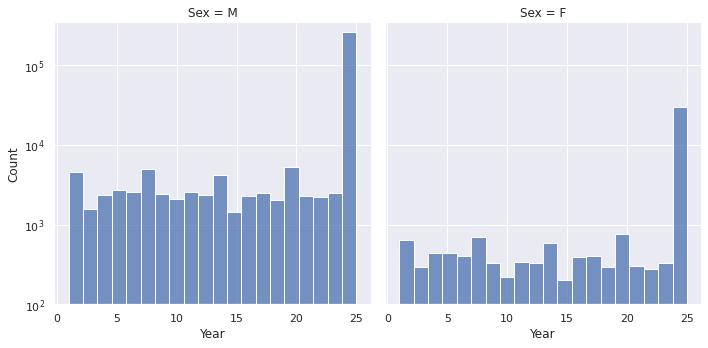

<AxesSubplot:xlabel='Year', ylabel='Count'>

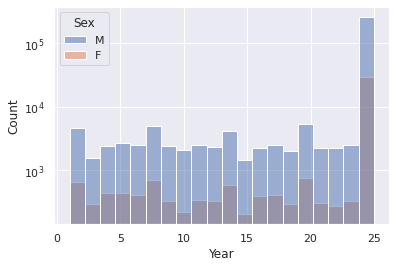

In [27]:
import matplotlib.pyplot as plt


sns.displot(data=n_years, x='Year', col='Sex', log_scale=(False, True))
plt.ylim(bottom=1e2)
plt.show()
sns.histplot(data=n_years, x='Year', hue='Sex', log_scale=(False, True))

In [28]:
n_years[n_years['Year'] == 25]

,,Year
ID Number,Sex,
100013,M,25
100021,M,25
100048,M,25
100064,M,25
100072,M,25
...,...,...
383266908,M,25
393199970,M,25
393199980,M,25


In [29]:
country_ppl = data[['ID Number', 'Sex', 'Fed']].drop_duplicates()


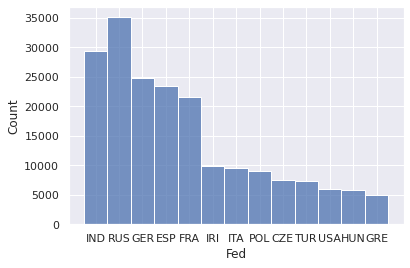

In [30]:
n_in_country = country_ppl.groupby(['Sex', 'Fed']).count()
n_in_country = n_in_country.sort_values(by='ID Number', ascending=False)

sns.histplot(data=n_in_country[n_in_country["ID Number"] > 5000].reset_index(), x='Fed', weights='ID Number')
plt.show()

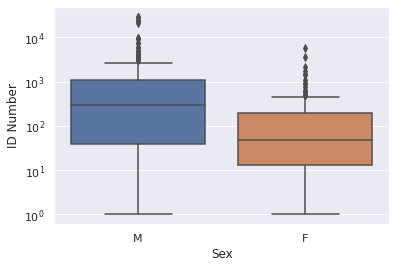

In [31]:
ax = sns.boxplot(data=n_in_country.reset_index(), y='ID Number', x='Sex')
ax.set_yscale('log')
plt.show()

In [32]:
print(n_in_country.loc["F"].loc["CZE"])
n_in_country.loc["M"].loc["CZE"]

ID Number    496
Name: CZE, dtype: int64


ID Number    7487
Name: CZE, dtype: int64

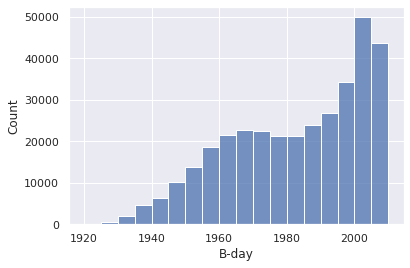

In [33]:
age_ppl = data[['ID Number', 'Sex', 'B-day']].drop_duplicates().reset_index()

sns.histplot(data=age_ppl[age_ppl['B-day'] > 1900], x='B-day', binrange=[1920, 2010], binwidth=5)
plt.show()

In [34]:
ids = age_ppl[(age_ppl['B-day'] < 1910) & (age_ppl['B-day'] > 0)]["ID Number"]
data[data["ID Number"].isin(ids)].drop_duplicates(["ID Number"]).sort_values("B-day")

,ID Number,Name,Fed,Sex,Tit,WTit,OTit,FOA,Rat,Gms,K,B-day,Flag,Year,Mon
3506,12573876,"Aghili Mofid, Davood",IRI,M,NaN,NaN,NaN,NaN,1504,0,20,0,NaN,2017,12
183053,3827852,"Nieto, Cesar",PER,M,NaN,NaN,NaN,NaN,1300,0,40,0,i,2017,12
169278,5213525,"Mirano, Jan Francis",PHI,M,NaN,NaN,NaN,NaN,2012,0,40,993,i,2017,12
282414,1658344,"Wegan, Barbara",AUT,F,NaN,NaN,NaN,NaN,1705,0,40,1048,w,2017,12
218679,4704118,Robert Guri,ALB,M,NaN,NaN,NaN,NaN,1206,0,40,1059,NaN,2017,12
233837,1453475,"Schjodte, Bo Blok",DEN,M,NaN,NaN,NaN,NaN,1512,1,40,1076,NaN,2017,12
108155,21600376,Hussein Ally,TAN,M,NaN,NaN,NaN,NaN,1468,1,40,1194,NaN,2017,12
208685,42593859,"Nazari, Farhad",IRI,M,NaN,NaN,NaN,NaN,1391,9,40,1347,NaN,2019,6
69024,9012435,Elghazouani abdeslam,MAR,M,NaN,NaN,NaN,NaN,1492,0,40,1657,NaN,2017,12
128479,1466801,"Kastberg, Anders",DEN,M,NaN,NaN,NaN,NaN,1830,7,40,1664,NaN,2018,5


In [35]:
data["active"] = True
data.loc[~data["Flag"].isna() & data["Flag"].str.contains("i"), "active"] = False

data["active"]

0          True
1          True
2         False
3         False
4          True
          ...  
352221     True
352222    False
352223    False
352224    False
352225    False
Name: active, Length: 8081358, dtype: bool

In [36]:
inactive_counts = data[["Year", "Mon", "active"]].groupby(["Year", "Mon"])
inactive_counts = inactive_counts.sum() / inactive_counts.count()
inactive_counts = inactive_counts.reset_index()
inactive_counts["Year / month"] = [f"{y} / {m if (len(str(m)) == 2) else ('0' + str(m))}" for y, m in zip(inactive_counts["Year"], inactive_counts["Mon"])]
inactive_counts

,Year,Mon,active,Year / month
0,2017,12,0.550178,2017 / 12
1,2018,1,0.547053,2018 / 01
2,2018,2,0.545345,2018 / 02
3,2018,3,0.544493,2018 / 03
4,2018,4,0.535512,2018 / 04
5,2018,5,0.533515,2018 / 05
6,2018,6,0.530543,2018 / 06
7,2018,7,0.527663,2018 / 07
8,2018,8,0.524840,2018 / 08
9,2018,9,0.522068,2018 / 09


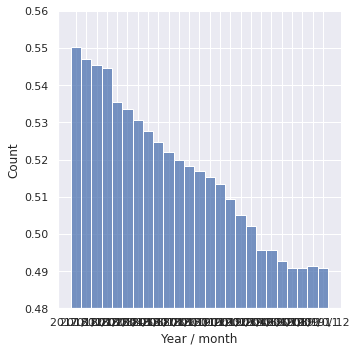

In [37]:
ax = sns.displot(data=inactive_counts.reset_index(), x="Year / month", weights="active", discrete=True)
ax.set(ylim=(0.48, 0.56))
# TODO roky místo divnolabels
# percentage
plt.show()

<AxesSubplot:xlabel='Mon', ylabel='Count'>

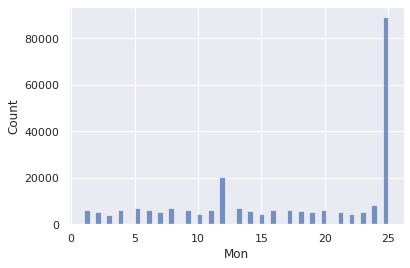

In [44]:
active_ppl = data[data["active"]][["ID Number", "Mon"]].groupby("ID Number").count()

sns.histplot(data=active_ppl.reset_index(), x="Mon")

In [46]:
data

,ID Number,Name,Fed,Sex,Tit,WTit,OTit,FOA,Rat,Gms,K,B-day,Flag,Year,Mon,active
0,644498,NaN,FRA,M,NaN,NaN,NaN,NaN,2008,1,20,0,NaN,2017,12,True
1,20504578,NaN,MAW,M,NaN,NaN,NaN,NaN,1617,0,40,0,NaN,2017,12,True
2,35077023,A Chakravarthy,IND,M,NaN,NaN,NaN,NaN,1151,0,40,1986,i,2017,12,False
3,10207538,"A E M, Doshtagir",BAN,M,NaN,NaN,NaN,NaN,1840,0,40,1974,i,2017,12,False
4,10206612,"A K M, Sourab",BAN,M,NaN,NaN,NaN,NaN,1708,4,40,0,NaN,2017,12,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352221,21836060,"Zyto, Karol",POL,M,NaN,NaN,NaN,NaN,1071,0,40,2006,NaN,2019,12,True
352222,34190632,"Zyubin, Sergey",RUS,M,NaN,NaN,NaN,NaN,1884,0,40,1975,i,2019,12,False
352223,24232602,"Zyuzev, Pavel",RUS,M,NaN,NaN,NaN,NaN,1852,0,40,1993,i,2019,12,False
352224,1189980,"Zywert, Kacper",POL,M,NaN,NaN,NaN,NaN,1565,0,20,1999,i,2019,12,False


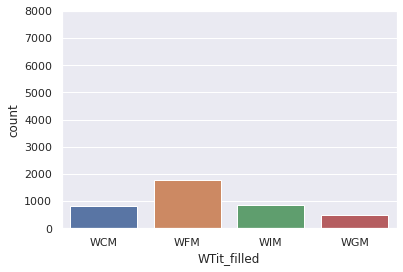

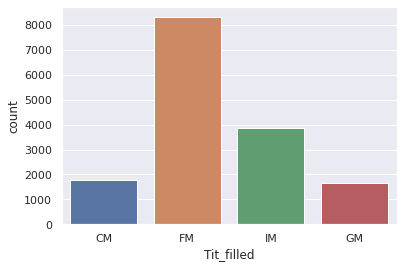

0.10465177955763008
0.04909460150852666


In [140]:
data["WTit_filled"] = data["WTit"].fillna('None')
data["Tit_filled"] = data["Tit"].fillna('None')

titles = data[["ID Number", "Sex", "WTit_filled", "Tit_filled"]].drop_duplicates(["ID Number", "WTit_filled", "Tit_filled"])

sns.countplot(data=titles[titles["Sex"] == "F"], x="WTit_filled",
              order=["WCM", "WFM", "WIM", "WGM"])
plt.ylim((0, 8000))
plt.show()

sns.countplot(data=titles[titles["Sex"] == "M"], x="Tit_filled",
              order=["CM", "FM", "IM", "GM"])
plt.show()

ftitles = titles[(titles["Sex"] == "F")]
mtitles = titles[(titles["Sex"] == "M")]

print(len(ftitles[ftitles["WTit_filled"] != "None"]) / len(ftitles))
print(len(mtitles[mtitles["Tit_filled"] != "None"]) / len(mtitles))

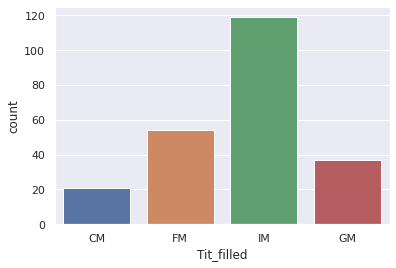

In [184]:
sns.countplot(data=titles[titles["Sex"] == "F"], x="Tit_filled", order=["CM", "FM", "IM", "GM"])
plt.show()

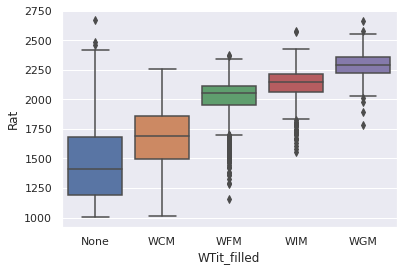

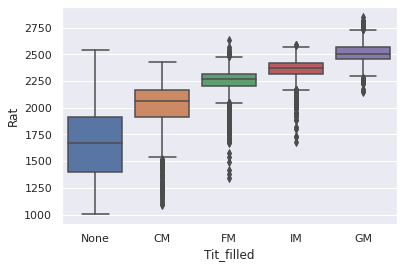

In [70]:
data["WTit_filled"] = data["WTit"].fillna('None')
data["Tit_filled"] = data["Tit"].fillna('None')


def group_rating(d, title):
    name = f"{title}_filled"
    d[name] = d[title].fillna("None")
    
    return d[["ID Number", "Rat", name]].groupby(["ID Number", name]).mean().reset_index()


sns.boxplot(data=group_rating(data[data["Sex"] == "F"].copy(), "WTit"), x='WTit_filled', y="Rat",
            order=["None", "WCM", "WFM", "WIM", "WGM"])
plt.show()

sns.boxplot(data=group_rating(data[data["Sex"] == "M"].copy(), "Tit"), x='Tit_filled', y="Rat",
            order=["None", "CM", "FM", "IM", "GM"])
plt.show()

TIT/TITL - title of a player (g - Grand Master, wg - Woman Grand Master, m - Interntional Master,
                              wm - Woman International Master, f - FIDE Master, wf - Woman FIDE Master, c - Candidate Master, wc - Woman Candidate Master)


,ID Number,Name,Fed,Sex,Tit,WTit,OTit,FOA,Rat,Gms,K,B-day,Flag,Year,Mon,active,WTit_filled,Tit_filled
0,644498,NaN,FRA,M,NaN,NaN,NaN,NaN,2008,1,20,0,NaN,2017,12,True,None,None
1,20504578,NaN,MAW,M,NaN,NaN,NaN,NaN,1617,0,40,0,NaN,2017,12,True,None,None
2,35077023,A Chakravarthy,IND,M,NaN,NaN,NaN,NaN,1151,0,40,1986,i,2017,12,False,None,None
3,10207538,"A E M, Doshtagir",BAN,M,NaN,NaN,NaN,NaN,1840,0,40,1974,i,2017,12,False,None,None
4,10206612,"A K M, Sourab",BAN,M,NaN,NaN,NaN,NaN,1708,4,40,0,NaN,2017,12,True,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352221,21836060,"Zyto, Karol",POL,M,NaN,NaN,NaN,NaN,1071,0,40,2006,NaN,2019,12,True,None,None
352222,34190632,"Zyubin, Sergey",RUS,M,NaN,NaN,NaN,NaN,1884,0,40,1975,i,2019,12,False,None,None
352223,24232602,"Zyuzev, Pavel",RUS,M,NaN,NaN,NaN,NaN,1852,0,40,1993,i,2019,12,False,None,None
352224,1189980,"Zywert, Kacper",POL,M,NaN,NaN,NaN,NaN,1565,0,20,1999,i,2019,12,False,None,None


In [73]:
data[data["active"]][["ID Number", "Mon"]].groupby("ID Number").count()

,Mon
ID Number,
100013,25
100072,25
100129,21
100137,5
100188,24
...,...
651022230,1
651022974,1
651023040,1


In [126]:
all_timers = active_ppl[active_ppl["Mon"] == 25]
all_timers = data[data["ID Number"].isin(all_timers.index)].reset_index()
print(len(all_timers["ID Number"].unique()))

89077


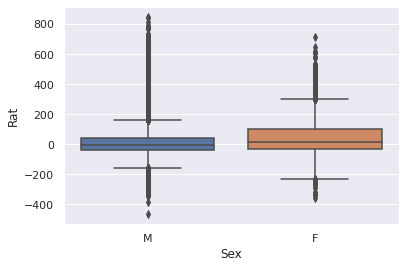

In [128]:
first_month = all_timers[all_timers["Year / month"] == "2017 / 12"].set_index("ID Number")
last_month = all_timers[all_timers["Year / month"] == "2019 / 12"].set_index("ID Number")

rating_diff = last_month["Rat"] - first_month["Rat"]
rating_diff = rating_diff.to_frame()
rating_diff["Sex"] = first_month["Sex"]

sns.boxplot(data=rating_diff, x="Sex", y="Rat")
plt.show()